In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm, tqdm_notebook
import warnings

warnings.filterwarnings('ignore')

In [2]:
SEED = 99
np.random.seed(SEED)

In [3]:
##### Activation Functions #####

def sigmoid(x):
    """
        This activation function returns a value (probability) between 0 and 1
    """
    
    return 1/(1+np.exp(-x))

def tanh(x):
    """
        This activation function returns a value between -1 and 1
    """
    
    return np.tanh(x)

def relu(x):
    """
        This activation function returns a value which is either 0 or 1
    """
    
    return np.maximum(x, 0)

def linear(x):
    """
        This activation function returns a value which is linear
    """
    
    return x

In [4]:
##### Metrics #######   

In [5]:
##### Neuron #####

class Neuron:
    """
        Neural Network Neuron Implementation
    """
    
    def __init__(self, input_weights, bias, activation):
        """
            input_weights: np.array() -> an array of shape n by 1 (n x 1) where n represents the number of inputs or activations from the previous layer
            bias: np.float64() -> a scalar value of shape 1 by 1
            activation: str -> the activation function for the neuron
        """
        
        self.activation = activation
        self.weights = input_weights # np.array of randomly initialized weights
        self.bias = bias # randomly initialized bias

    def __str__(self):
        return "Neuron <activation: %s>" % self.activation

    def __repr__(self):
        return "Neuron <activation: %s>" % self.activation

    def output(self, X):
        """
            X: np.array() -> an array of input values of shape m by n (m x n) into the neuron where m represents the number training examples or batch size and n represents the number of inputs
        """
        
        z = np.dot(X, self.weights) + self.bias
        
        if self.activation == 'sigmoid':
            output = sigmoid(z)
            return output
        
        elif self.activation == 'tanh':
            output = tanh(z)
            return output
        
        elif self.activation == 'relu':
            output = relu(z)
            return output
        
        elif self.activation == 'linear':
            output = linear(z)
            return output

##### Layer #####

class Layer:
    """
        Neural Network Layer Implementation.
    """
    
    def __init__(self, num_inputs, num_units, activation='sigmoid'):
        """
            num_inputs: int -> number of inputs into the network layer
            num_units: int -> number of neuron units in a specific layer of a neural network
            activation: str -> activation for that particular layer
            self.neurons: np.array -> initialized neurons for the network
            self.layer_weights: np.array -> l by k (l x k) where l is the number of inputs from the previous layer and k is the number of neurons in the layer
        """
        
        self.num_units = num_units
        self.activation = activation
        
        self.neurons = np.array([
            Neuron(activation=self.activation, 
                   input_weights=np.random.randn(num_inputs), 
                   bias=np.random.randn()) for unit in range(self.num_units)]) # assigning random weights and biases
        
        self.layer_weights = np.array([neuron.weights for neuron in self.neurons]).T
        self.layer_biases = np.array([neuron.bias for neuron in self.neurons])
 
    def output(self, X):
        """
            X: np.array() -> an array of dimension m by l (m x l) where m is the number of training examples and l is the number of inputs from the previous layer
            
            returns outputs -> an array of dimension m by k (m x k) where m is the number of training examples and k is the number of neurons in the layer
        """
        
        z = np.dot(X, self.layer_weights) + self.layer_biases
        
        if self.activation == 'sigmoid':
            output = sigmoid(z)
            return output
        
        elif self.activation == 'tanh':
            output = tanh(z)
            return output
        
        elif self.activation == 'relu':
            output = relu(z)
            return output
        
        elif self.activation == 'linear':
            output = linear(z)
            return output
    
#     def update_weights_and_biases(self, weights, biases):
#         self.weights = weights.T
#         self.biases = biases


if __name__ == "__main__":
    pass

In [18]:
class Network:
    
    _delta = 0.0001
    
    def __init__(self, layers=[]):
        self.layers = np.array(layers) # initilaize random weights to the layers
        self.network_weights = [
            layer.layer_weights for layer in self.layers
        ]
        self.network_biases = [
            layer.layer_biases for layer in self.layers
        ]
        
        self.history_loss = np.inf
        
 
#         self.init_weights = copy.deepcopy(self.weights)
#         self.init_biases = copy.deepcopy(self.biases)
#         self.init_loss = 0
#         self.loss_metric = ''

    def forward(self, X, layers):
        
        outputs = X.copy()
        
        for layer in layers:
            outputs = layer.output(outputs)
        return outputs
    
    def update_weights_and_biases(self, X, y, learning_rate=0.01):
        ref_layers = deepcopy(self.layers)
        updated_layers = deepcopy(self.layers)
        
        ref_outputs = self.forward(X, ref_layers)
        ref_loss = mse(y, ref_outputs) 
        
        ## weight updates
        for layer_idx in range(len(ref_layers)):
            dynamic_layers = deepcopy(self.layers)
            for neuron_idx in range(len(dynamic_layers[layer_idx].layer_weights)):
                for weight_idx in range(len(dynamic_layers[layer_idx].layer_weights[neuron_idx])):
#                     print(ref_layers[layer_idx].layer_weights[neuron_idx][weight_idx])
#                     print('*'*30)
#                     print(self.layers[layer_idx].layer_weights[neuron_idx][weight_idx])
#                     print(dynamic_layers[layer_idx].layer_weights[neuron_idx][weight_idx])
                    dynamic_layers[layer_idx].layer_weights[neuron_idx][weight_idx] += Network._delta
#                     print(dynamic_layers[layer_idx].layer_weights[neuron_idx][weight_idx])
                    
                    ##### forward #####
                    outputs = self.forward(X, dynamic_layers)
#                     print(outputs)
                    temp_loss = mse(y, outputs)
#                     print(f"Loss after changing weight by delta: {temp_loss}")
#                     print(f"Loss after before changing weight by delta: {ref_loss}")
                    
                    #### get change in loss w.r.t change in weight
                    d_L = temp_loss - ref_loss
#                     print(temp_loss)
#                     print(ref_loss)
                    d_W = Network._delta
                    
                    dL_dW = d_L/d_W
                    
#                     print(dL_dW)
                    
#                     print(updated_layers[layer_idx].layer_weights)
                    
                    #### update weights
                    updated_layers[layer_idx].layer_weights[neuron_idx][weight_idx] -= learning_rate*dL_dW
                    
        ## bias updates
        for layer_idx in range(len(ref_layers)):
            dynamic_layers = deepcopy(self.layers)
            for neuron_idx in range(len(dynamic_layers[layer_idx].layer_biases)):
                dynamic_layers[layer_idx].layer_biases[neuron_idx] += Network._delta

                ##### forward #####
                outputs = self.forward(X, dynamic_layers)
                temp_loss = mse(y, outputs)
#                 print(f"Loss after changing weight by delta: {temp_loss}")
#                 print(f"Loss after before changing weight by delta: {ref_loss}")

                #### get change in loss w.r.t change in bias
                d_L = temp_loss - ref_loss
                d_B = Network._delta

                dL_dB = d_L/d_B
                
#                 print(dL_dB)
                
#                 print(updated_layers[layer_idx].layer_biases)

                #### update weights
                updated_layers[layer_idx].layer_biases[neuron_idx] -= learning_rate*dL_dB
        
#         print(ref_layers[0].layer_weights)
#         print("*"*60)
#         print(updated_layers[0].layer_weights)
        new_loss = mse(y, self.forward(X, updated_layers))
        self.layers = deepcopy(updated_layers)
        return new_loss
    
    def fit(self, X, y, batch_size, epochs=400, learning_rate=0.01):
        init_lr = learning_rate
        losses = []
        num_batches = np.int32(np.ceil(np.float32(len(X)) / batch_size))
        print(num_batches)
        for epoch in tqdm(iterable=range(epochs), desc=f'Training for {epochs} epochs', total=len(range(epochs))): # tqdm_notebook
            epoch_loss = 0
            for batch_num in range(num_batches):
                if batch_num == (num_batches - 1):
                    batch_X = X[batch_num*batch_size:,:]
                    batch_y = y[batch_num*batch_size:,:]
                else:
                    batch_X = X[batch_num*batch_size:(batch_num+1)*batch_size,:]
                    batch_y = y[batch_num*batch_size:(batch_num+1)*batch_size,:]
                new_loss = self.update_weights_and_biases(batch_X, batch_y, learning_rate=init_lr)
#                 print(new_loss)
                epoch_loss += new_loss
#             print(f"EPOCH {epoch} completed with loss: {epoch_loss}")
            losses.append(epoch_loss)
#             if epoch_loss == self.history_loss:
#                 init_lr -= init_lr*.01
#             print(f'loss before: {self.history_loss}')
#             self.history_loss = epoch_loss
#             print('*'*60)   
        return losses
        
    def predict(self, X):
        outputs = self.forward(X, layers=self.layers)
        return outputs
                   
        
#     def re_init(self,):
#         self.weights = np.array([np.array([np.array([0.0 for feature in range(layer.input_shape)]) for unit in range(layer.units)]) for layer in self.layers])
#         self.biases = np.array([np.array([0.0 for unit in range(layer.units)]) for layer in self.layers])
        
#         #******************************************#
#         self.assign_weights_to_layers()
#         self.init_weights = copy.deepcopy(self.weights)
#         self.init_biases = copy.deepcopy(self.biases)
#         self.init_loss = 0
#         self.loss_metric = ''
        
#     def assign_weights_to_layers(self,):
#         for layer_idx in range(len(self.weights)):
#             for unit_idx in range(len(self.weights[layer_idx])):
#                 self.layers[layer_idx].neurons[unit_idx].weights = self.weights[layer_idx][unit_idx]
#                 self.layers[layer_idx].neurons[unit_idx].bias = self.biases[layer_idx][unit_idx]
        
#     def weights_and_biases(self, ):
#         return self.weights, self.biases
    
#     def layers(self,):
#         return self.layers
    
#     def num_weights_and_biases(self, ):
#         num_weights = 0
#         num_biases = 0
#         for layer in self.weights:
#             for unit in layer:
#                 for weight in unit:
#                     num_weights += 1
                    
#         for layer in self.biases:
#             for unit in layer:
#                 num_biases += 1
                
#         return num_weights, num_biases
    
#     def update_weights_and_biases(self, weights, biases):
#         for layer_idx in range(len(weights)):
#             self.layers[layer_idx].update_weights_and_biases(weights[layer_idx], biases[layer_idx])
    
#     def loss_function(self, y_true, y_pred):
#         if self.loss_metric == 'mse':
#             return mse(y_true, y_pred)
#         elif self.loss_metric == 'rmse':
#             return mse(y_true, y_pred, squared=False)
#         elif self.loss_metric == 'binary_crossentropy':
#             return -1 * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
#         elif self.loss_metric == 'sparse_categorical_crossentropy':
#             pass
    
#     def fit(self, X, y, loss_metric='mse', learning_rate=0.01, EPOCHS=100):
#         self.re_init()
#         self.loss_metric = loss_metric
#         self.calculate_init_loss(X, y)
        
#         # forward and backward propagations
#         preds, loss = self.learn_params(X, y, learning_rate, EPOCHS)
#         return preds, loss

#     def calculate_init_loss(self, X, y):
#         init_preds = self.output(X)
#         self.init_loss = self.loss_function(init_preds, y)
    
#     def reinitialize_weights_and_biases(self, weights, biases):
#         self.init_weights = copy.deepcopy(weights)
#         self.init_biases = copy.deepcopy(biases)
        
#     def optimize_learning(self, X, y, loss_metric='mse'):
#         best_eta = 0
#         min_loss = np.inf
#         possible_etas = np.arange(0,1,1e-4)
        
#         for eta in possible_etas:
#             preds, loss, = self.fit(X, y, loss_metric=loss_metric, learning_rate=eta, EPOCHS=100)
#             if loss < min_loss:
#                 best_eta = eta
#                 min_loss = loss
                
#         return self.fit(X, y, loss_metric=loss_metric, learning_rate=best_eta, EPOCHS=100), best_eta
    
#     def predict(self, test):
#         return self.output(test)
            
#     def learn_params(self, X, y, learning_rate, EPOCHS):
        
#         preds_history = []
        
#         for i in range(EPOCHS):
#             for layer_idx in range(len(self.weights)):
#                 for unit_idx in range(len(self.weights[layer_idx])):
#                     for weight_idx in range(len(self.weights[layer_idx][unit_idx])):
#                         weights_copy = copy.deepcopy(self.init_weights)
#                         weights_copy[layer_idx][unit_idx][weight_idx] += 0.01

#                         # get prediction from changing the current weight 
#                         self.update_weights_and_biases(weights_copy, self.init_biases)
#                         cur_pred = self.output(X)
                        
#                         loss = self.loss_function(y, cur_pred)
#                         dJ_dw = (loss - self.init_loss) / 0.01
#                         self.weights[layer_idx][unit_idx][weight_idx] =- (learning_rate * dJ_dw)
#                         self.update_weights_and_biases(self.init_weights, self.init_biases)
                        
#                     # update the bias term
#                     bias_copy = copy.deepcopy(self.init_biases)
#                     bias_copy[layer_idx][unit_idx] = bias_copy[layer_idx][unit_idx] + 0.01
#                     self.update_weights_and_biases(self.init_weights, bias_copy)
#                     cur_pred = self.output(X)
#                     loss = self.loss_function(y, cur_pred)
#                     dJ_db = (loss - self.init_loss) / 0.01   
                    
#                     # update bias parameter
#                     self.biases[layer_idx][unit_idx] -= (learning_rate * dJ_db)
#                     self.update_weights_and_biases(self.init_weights, self.init_biases)
           
#             # Reassign weights to the layers after each EPOCH
#             self.update_weights_and_biases(self.weights, self.biases)
#             self.reinitialize_weights_and_biases(self.weights, self.biases)
#             new_preds = self.output(X)
#             preds_history.append(new_preds)  
#             new_loss = self.loss_function(y, new_preds)
#             if (new_loss > self.init_loss) and i > 2:
#                 print(f"\n{'='*40}End of Training. Convergence Reached{'='*40}\n\n")
#                 break 
#             self.init_loss = self.loss_function(y, new_preds) 
#             print(f"Loss after epoch {i+1} ******************{self.init_loss}***********************")
#         if i == 99:
#             print(f"\n{'='*39}End of Training. Specified EPOCHS Exhausted{'='*39}\n\n")
#         return preds_history[-2], self.init_loss

In [19]:
X = np.array([[1,1],
              [1,2],
              [1,3],
              [1,4],
              [1,5],
              [1,6],
              [1,7],
              [1,8],
             [3,5],
             [5,6],
             [2,3],
             [3,6],
             [4,5],
             [6,7],
             [1,4],
             [4,7],
             [6,8],
             [5,8],
             [4,6],
             [3,8],
             [2,10],
             [1,1],
             [3,2],
             [4,7],
             [5,4],
             [9,10],
             [4,8],
             [12,13],
             [11,12],
             [11,13],
             [14,15],
             [15,16],
             [14,17],
             [18,19],
             [8,15],
             [8,12],
             [10,14],
             [18,20],
             [15,16],
             [16,18],
             [20,22]])

In [20]:
y = np.zeros((X.shape[0], 1))

In [21]:
# y = x[0]**2 + x[1] + 5

In [22]:
for idx, row in enumerate(X):
#     print(idx)
    y[idx] = X[idx][0]**2 + X[idx][1] + 5

print(y)

[[  7.]
 [  8.]
 [  9.]
 [ 10.]
 [ 11.]
 [ 12.]
 [ 13.]
 [ 14.]
 [ 19.]
 [ 36.]
 [ 12.]
 [ 20.]
 [ 26.]
 [ 48.]
 [ 10.]
 [ 28.]
 [ 49.]
 [ 38.]
 [ 27.]
 [ 22.]
 [ 19.]
 [  7.]
 [ 16.]
 [ 28.]
 [ 34.]
 [ 96.]
 [ 29.]
 [162.]
 [138.]
 [139.]
 [216.]
 [246.]
 [218.]
 [348.]
 [ 84.]
 [ 81.]
 [119.]
 [349.]
 [246.]
 [279.]
 [427.]]


In [23]:
network = Network(
        [
            Layer(num_inputs=2, num_units=5, activation='relu'),
            Layer(num_inputs=5, num_units=4, activation='relu'),
            Layer(num_inputs=4, num_units=3, activation='relu'),
            Layer(num_inputs=3, num_units=1, activation='linear'),
        ]
    )

In [24]:
network.layers[0].layer_weights

array([[ 0.82031264, -0.2521043 , -0.13578705,  1.36433214, -0.48310578],
       [ 0.56061151, -1.38961345,  1.28790496, -0.30995664, -0.60898369]])

In [25]:
network.network_weights

[array([[ 0.82031264, -0.2521043 , -0.13578705,  1.36433214, -0.48310578],
        [ 0.56061151, -1.38961345,  1.28790496, -0.30995664, -0.60898369]]),
 array([[ 0.639322  ,  0.18310987, -1.00157763,  0.23230697],
        [ 0.77430395, -1.13322409, -0.56751101, -0.29510767],
        [ 1.2785694 , -0.27908571, -0.22565803, -0.361676  ],
        [ 0.70527602,  1.3966199 ,  0.93802381,  0.43211507],
        [ 0.65597738,  0.03221944,  0.83678413,  0.93395855]]),
 array([[ 0.09362341, -0.7879492 ,  0.84060764],
        [ 0.29482583,  1.59381165, -1.0230944 ],
        [ 1.48543077,  1.40590436,  0.4947723 ],
        [-1.08688515,  1.64475657,  0.8957326 ]]),
 array([[-0.11453052],
        [ 0.15689743],
        [ 0.38759667]])]

In [26]:
len(X)

41

In [27]:
losses = network.fit(X, y, batch_size=16, epochs=1000, learning_rate=0.01)

3


Training for 1000 epochs: 100%|████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.00it/s]


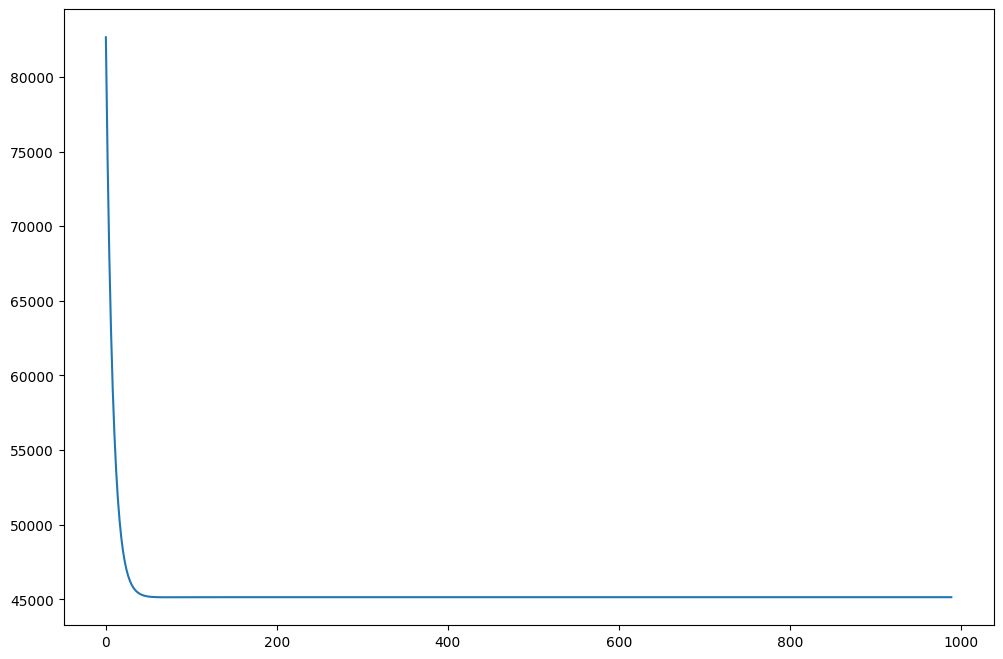

In [28]:
plt.figure(figsize=(12,8))
plt.plot(losses[10:])

In [60]:
network.predict(np.array([[3,8]]))

array([[26.38292853]])

In [61]:
network.update_weights_and_biases(X, y)

164.3905352804723

In [524]:
a = np.array([[1,2,3,4,5,6]])
b = np.array([2,3,4,5,6,7])

In [525]:
c = np.dot(a, b)

In [526]:
c

array([112])

In [527]:
d = np.array([3], dtype=np.float32)

In [528]:
c+d

array([115.])

In [529]:
(1*2) + (2*3) + (3*4) + (4*5) + (5*6) + (6*7)

112

In [530]:
a = np.array([
    [1,2,3,4,5,6],
    [2,3,4,5,6,7]
])

b = np.array([1,
              2,
              3,
              4,
              5,
              6])

In [531]:
np.dot(a, b).shape

(2,)

In [409]:
a.shape

(2, 6)

In [410]:
a * b

array([[ 1,  4,  9, 16, 25, 36],
       [ 2,  6, 12, 20, 30, 42]])

In [411]:
#### Layer structure

#### if a layer has 6 neurons for instance

## The weights for that layer will look like;

layer_weights = np.array([
    [], ### neuron 1
    [], ### neuron 2
    [],  ### neuron 3
    [], ### neuron 4
    [], ### neuron 5
    [], ### neuron 6
])

In [412]:
np.random.rand(1) + np.random.rand()

array([0.93641234])

In [413]:
a = np.array([[1,2,3,4,5],
              [2,3,4,5,6],
              [3,4,5,6,7],
              [4,5,6,7,8],
              [5,6,7,8,9]])


b = np.array([[1,2,3],
              [4,5,6],
              [7,8,9],
              [10,11,12],
              [13,14,15]])

In [414]:
np.dot(a, b)

array([[135, 150, 165],
       [170, 190, 210],
       [205, 230, 255],
       [240, 270, 300],
       [275, 310, 345]])

In [415]:
layer = Layer(num_inputs=5, num_units=4, activation='sigmoid')

In [416]:
layer.layer_biases

array([0.43702675, 0.95928087, 0.99790344, 0.25500046])

In [417]:
layer.layer_biases

array([0.43702675, 0.95928087, 0.99790344, 0.25500046])

In [418]:
layer.layer_weights + layer.layer_biases.T

array([[1.28440351, 1.07246236, 1.74392941, 1.1730198 ],
       [1.41076013, 1.84849966, 1.23057811, 0.69319307],
       [0.98675823, 1.29496203, 1.53265511, 1.00901726],
       [0.52989685, 1.62590647, 1.44012565, 0.94913779],
       [1.1181564 , 1.0703146 , 1.63551346, 1.07495158]])

In [419]:
layer.layer_weights + layer.layer_biases

array([[1.28440351, 1.07246236, 1.74392941, 1.1730198 ],
       [1.41076013, 1.84849966, 1.23057811, 0.69319307],
       [0.98675823, 1.29496203, 1.53265511, 1.00901726],
       [0.52989685, 1.62590647, 1.44012565, 0.94913779],
       [1.1181564 , 1.0703146 , 1.63551346, 1.07495158]])

In [420]:
X = np.array([[1,2,3,4,5],
             [6,7,8,9,10],
             [11,12,13,14,15],
             [16,17,18,19,20],
             [21,22,23,24,25]])

In [421]:
layer.output(X)

array([[0.99982633, 0.99915861, 0.99984477, 0.99998616],
       [1.        , 0.99999998, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ]])